<a href="https://colab.research.google.com/github/hafsaaaaaaaa/MLPROJECT_/blob/main/breast_cancer_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/archive (6).zip")

In [5]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
data.shape
#here we use it to get the shape of matrix it have 569 rows and 32 columns..

(569, 32)

In [9]:
data.info()
#this method provide us the information of datatypes of each column,num of non_null values and memory usage..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
data.isna().sum()
#this method used to count the number of missing values in each columns...

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 's

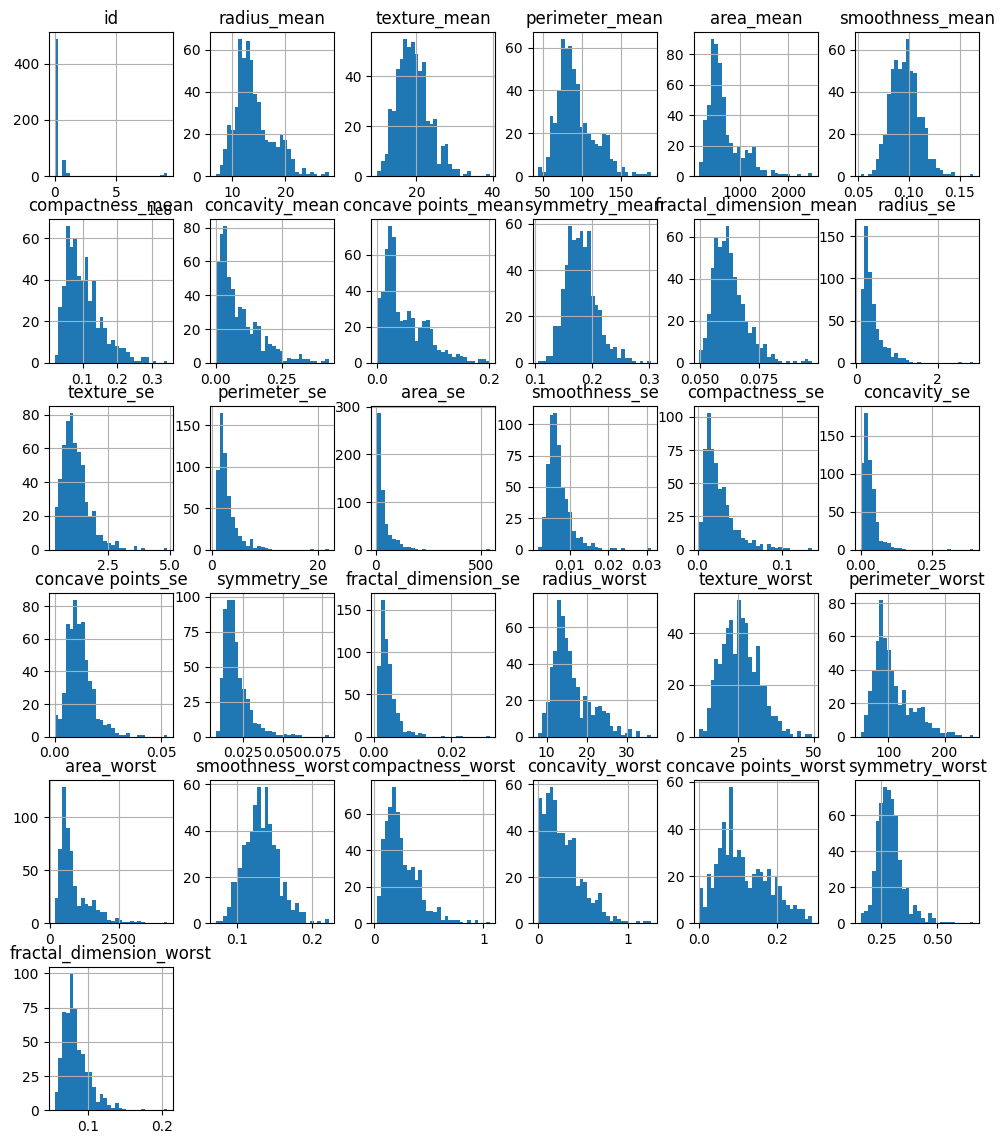

In [12]:
data.hist(figsize=(12,14),bins=30)
#this method is used to create histogram for each numerical coulmn....

In [13]:
data.columns
#here are the total columns we have in our dataset...

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<ipython-input-15-66a1c3b0d780>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 3))


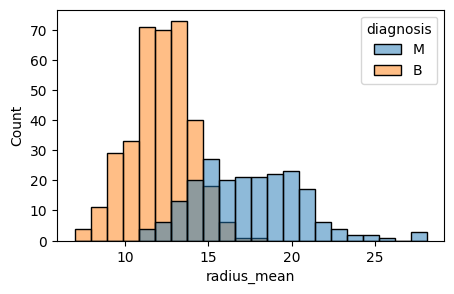

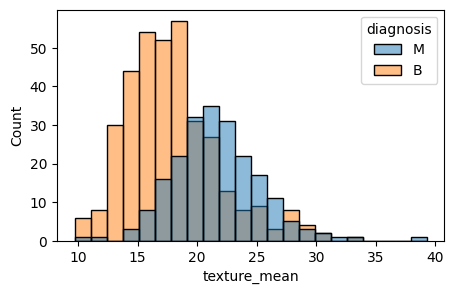

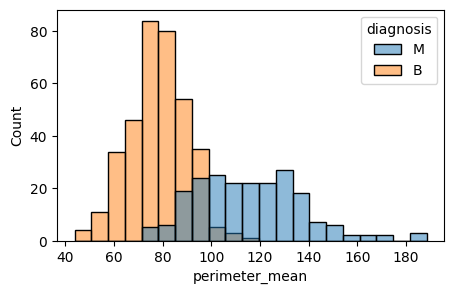

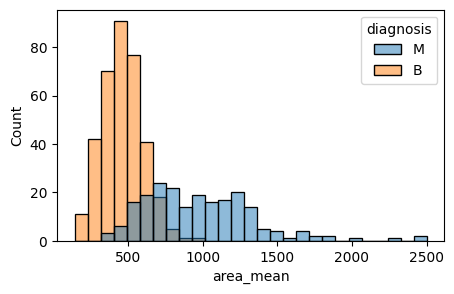

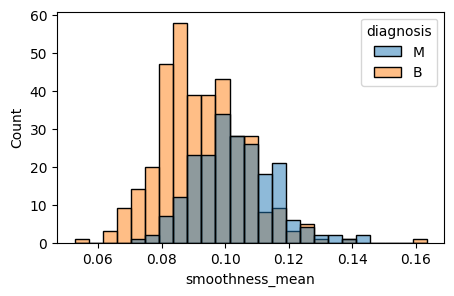

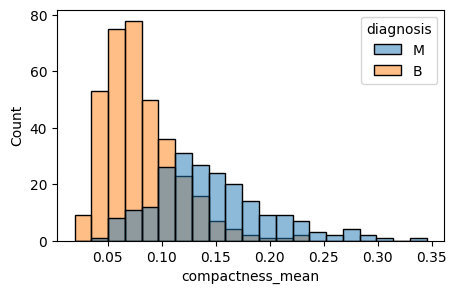

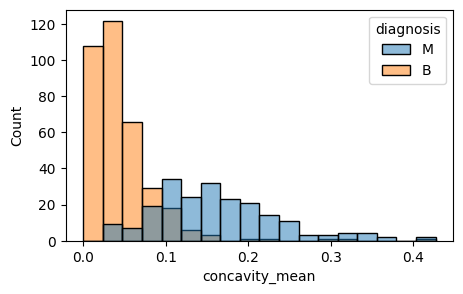

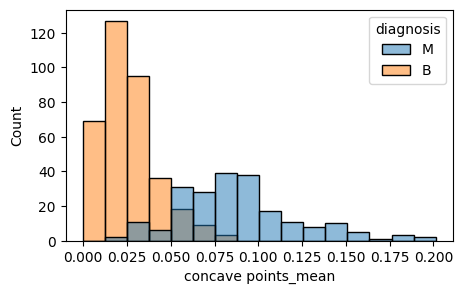

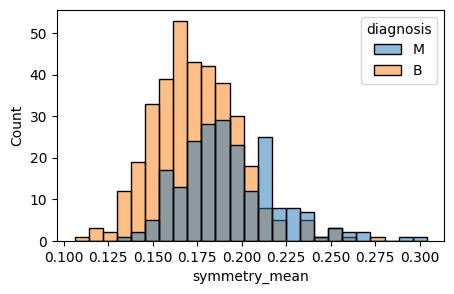

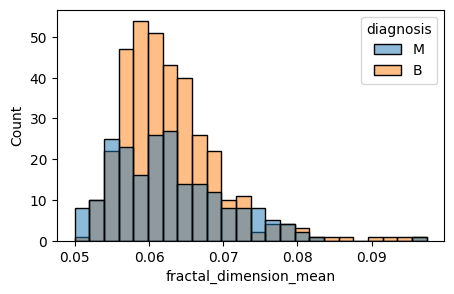

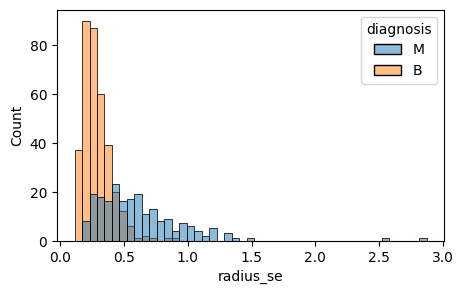

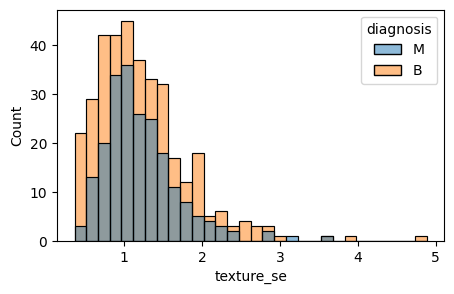

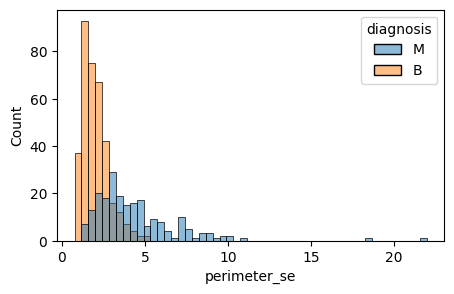

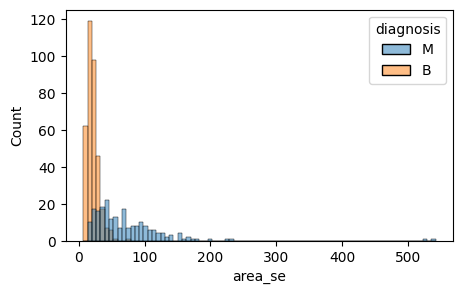

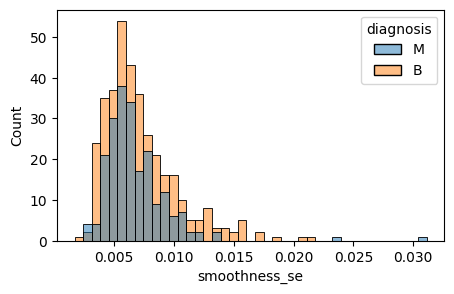

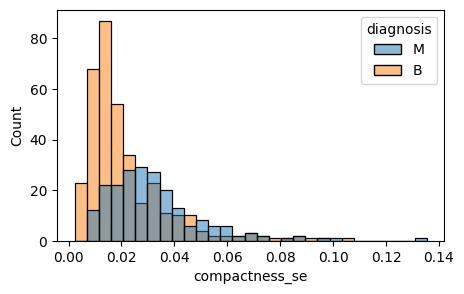

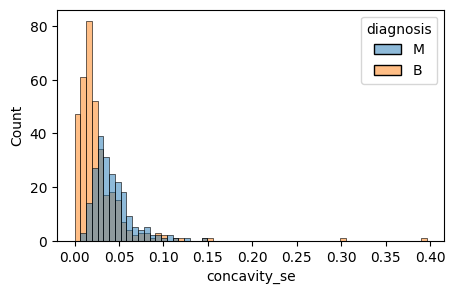

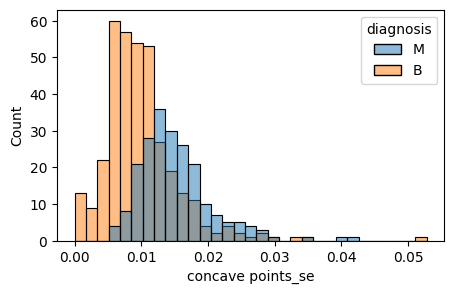

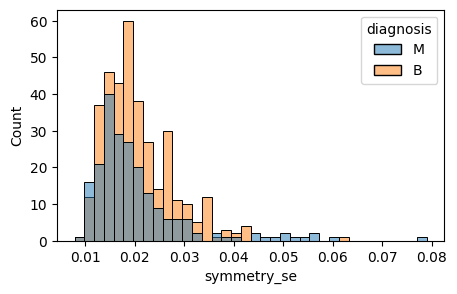

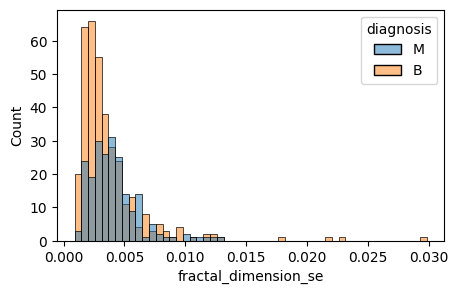

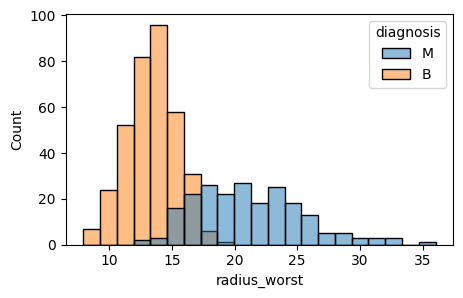

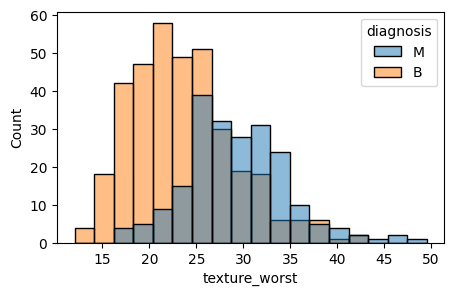

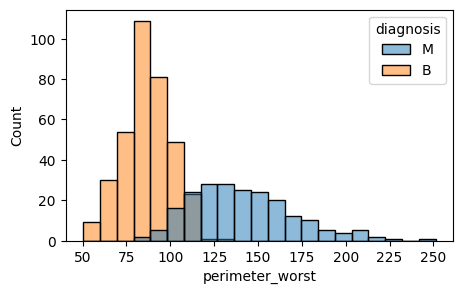

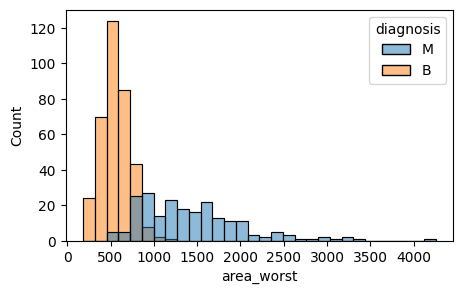

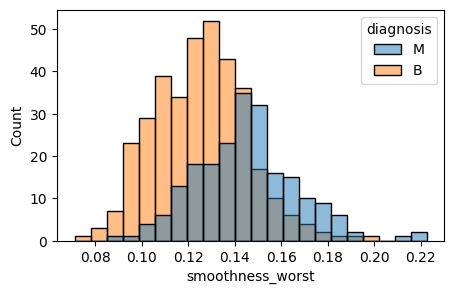

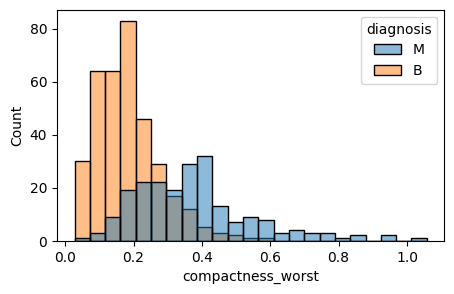

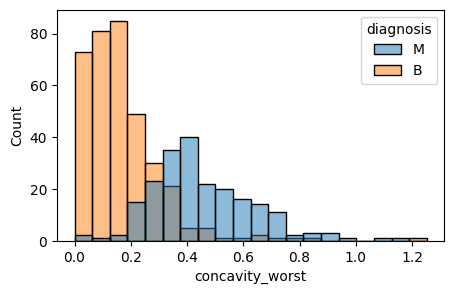

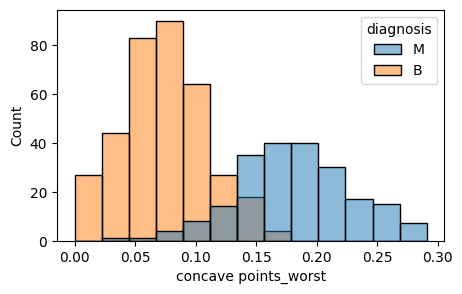

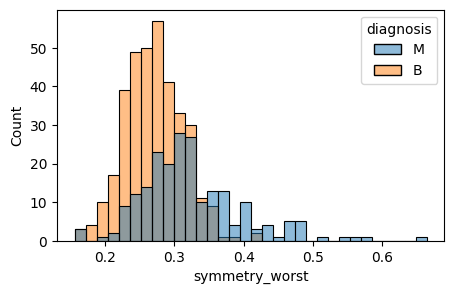

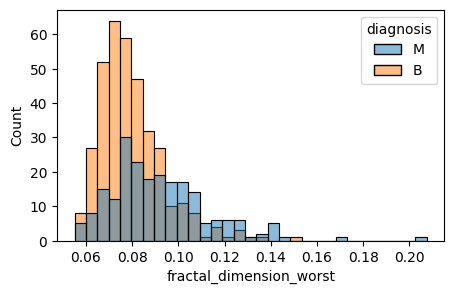

In [15]:
columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for column in columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=data, x=column, hue='diagnosis')
    #using above seaborn and matplotlib we create histogram for multiple columns ...

In [16]:
prep_data = data.copy()
#this method is used to create a copy of original data...it contains a duplicate of all the data and columns structures from the original data...

In [17]:
prep_data.drop('id', axis=1, inplace=True)
#here we will drop the column id from our prep_data.....

<ipython-input-19-2b1a4c4c4fa5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(prep_data.corr(), cmap='coolwarm')


<Axes: >

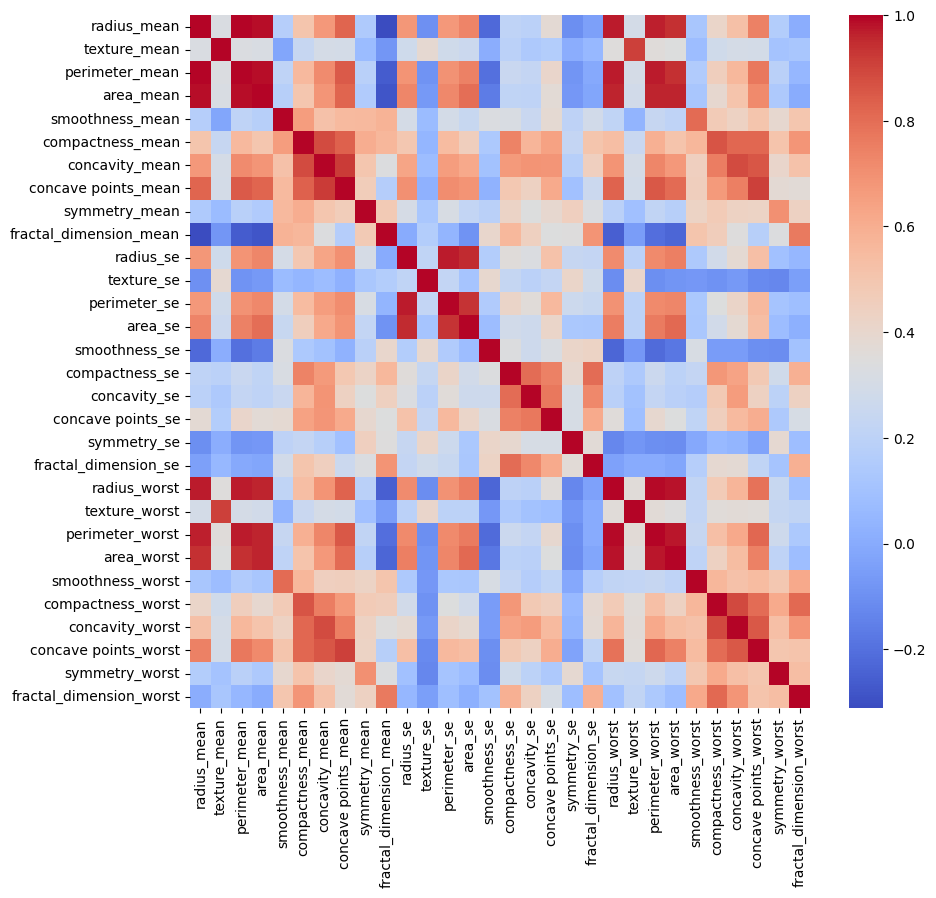

In [19]:
plt.figure(figsize=[10,9])
sns.heatmap(prep_data.corr(), cmap='coolwarm')
#this code will create a heatmap of correlation matrix ......it is used for visualization..

In [20]:
prep_data['diagnosis'].value_counts()
#this command is used to count the unique values in the diagnosis column...

B    357
M    212
Name: diagnosis, dtype: int64

In [21]:
X = prep_data.drop('diagnosis', axis=1)
y = prep_data['diagnosis']
#here we separate the features and the target variable...

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
#here our data is goining to be split for training and testing...

In [23]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
#decision tree model will be fit here...

DecisionTreeClassifier(random_state=42)

In [24]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
#here we make prediction on both training and testing part...

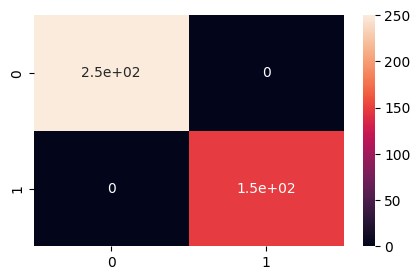

Train Accuracy: 1.0


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

# measuring performance for training data
train_accuracy = accuracy_score(y_train_pred, y_train)

matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(matrix_train, annot=True)
plt.show()

print('Train Accuracy: {}'.format(train_accuracy))
#here we evaluate the performance and calculate and displays metrics such as accuracy and a confusiin matrix.....

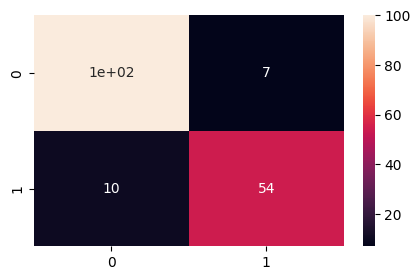

Test Accuracy: 0.9005847953216374


In [26]:
train_accuracy = accuracy_score(y_test_pred, y_test)

matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(matrix_test, annot=True)
plt.show()

print('Test Accuracy: {}'.format(train_accuracy))
#measuring the performance of testing data...

In [27]:
test_TP = matrix_test[0][0]
test_FP = matrix_test[0][1]
test_FN = matrix_test[1][0]
test_TN = matrix_test[1][1]

test_precision = test_TP/(test_TP+test_FP)
test_recall = test_TP/(test_TP+test_FN)

print('Recall and Precision: {}, {}'.format(round(test_recall, 4), round(test_precision, 4)))
#here we find recall and precision

Recall and Precision: 0.9091, 0.9346


<Axes: xlabel='Importance', ylabel='Feature'>

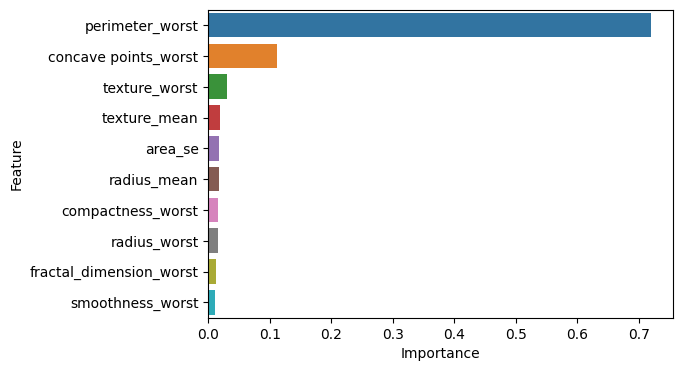

In [28]:
feature_importance = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}) \
                        .sort_values(by='Importance', ascending=False)

# plotting top 10 most important features
plt.figure(figsize=(6,4))
sns.barplot(data=feature_importance_df[:10], y='Feature', x='Importance')